スパースモデリング第14章　画像のノイズ除去
==
結果

In [4]:
from matplotlib.font_manager import FontProperties
from skimage.io import imread

font_path = u'/Library/Fonts/ヒラギノ角ゴ Pro W3.otf'
font_prop = FontProperties(fname=font_path)
plt.rc('font',family=font_prop.get_name())

def get_psnr(im, recon):
    """ PSNRを得る """ 
    return 10. * np.log(im.max() / np.sqrt(np.mean((im - recon) ** 2)))

def get_2D_dct(img):
    """ 2D DCT """
    return dct(dct(img.T, norm='ortho').T, norm='ortho')

def get_2d_idct(coeffs):
    """ 2D inverse DCT """
    return idct(idct(coeffs.T, norm='ortho').T, norm='ortho')

def show_dictionary(A, name=None):
    """ 辞書を表示 """
    n = int(np.sqrt(A.shape[0]))
    m = int(np.sqrt(A.shape[1]))
    A_show = A.reshape((n, n, m, m))
    fig, ax = plt.subplots(m, m, figsize=(4, 4))
    for row in range(m):
        for col in range(m):
            ax[row, col].imshow(A_show[:, :, col, row], cmap='gray', interpolation='Nearest')
            ax[row, col].axis('off')
    if name is not None:
        plt.savefig(name, dpi=220)

In [6]:
im = imread('barbara.png').astype(np.float)
Y = np.fromfile('barbara_sig20').reshape(im.shape)
recon_ws = np.fromfile('recon_ws').reshape(im.shape)
recon_dct_shrink = np.fromfile('recon_dct_shrink').reshape(im.shape)
recon_dct_shrinkage_curve = np.fromfile('recon_dct_shrinkage_curve').reshape(im.shape)
recon_dct_global_shrinkage_curve = np.fromfile('recon_dct_global_shrinkage_curve').reshape(im.shape)
recon_dct_dictionary = np.fromfile('recon_dct_dictionary').reshape(im.shape)
recon_ksvd_dictionary = np.fromfile('recon_ksvd_dictionary').reshape(im.shape)
recon_nlm = np.fromfile('recon_nlm', dtype=np.float32).reshape(im.shape)
recon_bm3d = np.fromfile('recon_bm3d', dtype=np.float32).reshape(im.shape)

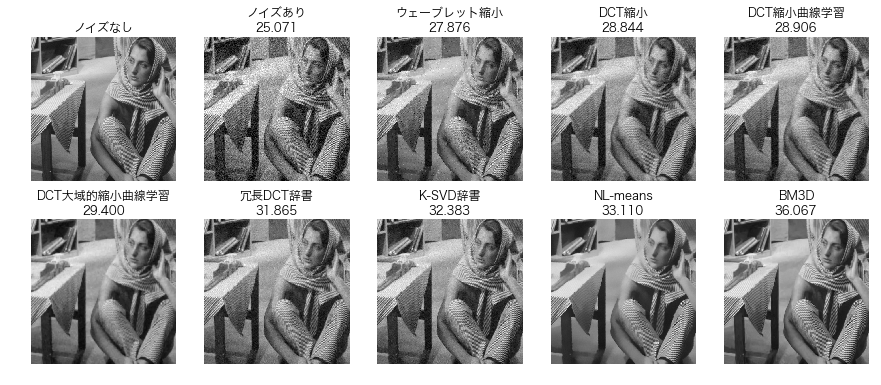

In [18]:
fig, ax = plt.subplots(2, 5, figsize=(15, 6))
ax = ax.flatten()
ax[0].imshow(im, cmap='gray', interpolation='Nearest', vmin=0, vmax=255)
ax[1].imshow(Y, cmap='gray', interpolation='Nearest', vmin=0, vmax=255)
ax[2].imshow(recon_ws, cmap='gray', interpolation='Nearest', vmin=0, vmax=255)
ax[3].imshow(recon_dct_shrink, cmap='gray', interpolation='Nearest', vmin=0, vmax=255)
ax[4].imshow(recon_dct_shrinkage_curve, cmap='gray', interpolation='Nearest', vmin=0, vmax=255)
ax[5].imshow(recon_dct_global_shrinkage_curve, cmap='gray', interpolation='Nearest', vmin=0, vmax=255)
ax[6].imshow(recon_dct_dictionary, cmap='gray', interpolation='Nearest', vmin=0, vmax=255)
ax[7].imshow(recon_ksvd_dictionary, cmap='gray', interpolation='Nearest', vmin=0, vmax=255)
ax[8].imshow(recon_nlm, cmap='gray', interpolation='Nearest', vmin=0, vmax=255)
ax[9].imshow(recon_bm3d, cmap='gray', interpolation='Nearest', vmin=0, vmax=255)
ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')
ax[3].axis('off')
ax[4].axis('off')
ax[5].axis('off')
ax[6].axis('off')
ax[7].axis('off')
ax[8].axis('off')
ax[9].axis('off')
ax[0].set_title('ノイズなし')
ax[1].set_title('ノイズあり\n{:.3f}'.format(get_psnr(im, Y)))
ax[2].set_title('ウェーブレット縮小\n{:.3f}'.format(get_psnr(im, recon_ws)))
ax[3].set_title('DCT縮小\n{:.3f}'.format(get_psnr(im, recon_dct_shrink)))
ax[4].set_title('DCT縮小曲線学習\n{:.3f}'.format(get_psnr(im, recon_dct_shrinkage_curve)))
ax[5].set_title('DCT大域的縮小曲線学習\n{:.3f}'.format(get_psnr(im, recon_dct_global_shrinkage_curve)))
ax[6].set_title('冗長DCT辞書\n{:.3f}'.format(get_psnr(im, recon_dct_dictionary)))
ax[7].set_title('K-SVD辞書\n{:.3f}'.format(get_psnr(im, recon_ksvd_dictionary)))
ax[8].set_title('NL-means\n{:.3f}'.format(get_psnr(im, recon_nlm)))
ax[9].set_title('BM3D\n{:.3f}'.format(get_psnr(im, recon_bm3d)))
# plt.tight_layout()
plt.savefig('ch14-denoise.png', dpi=220)

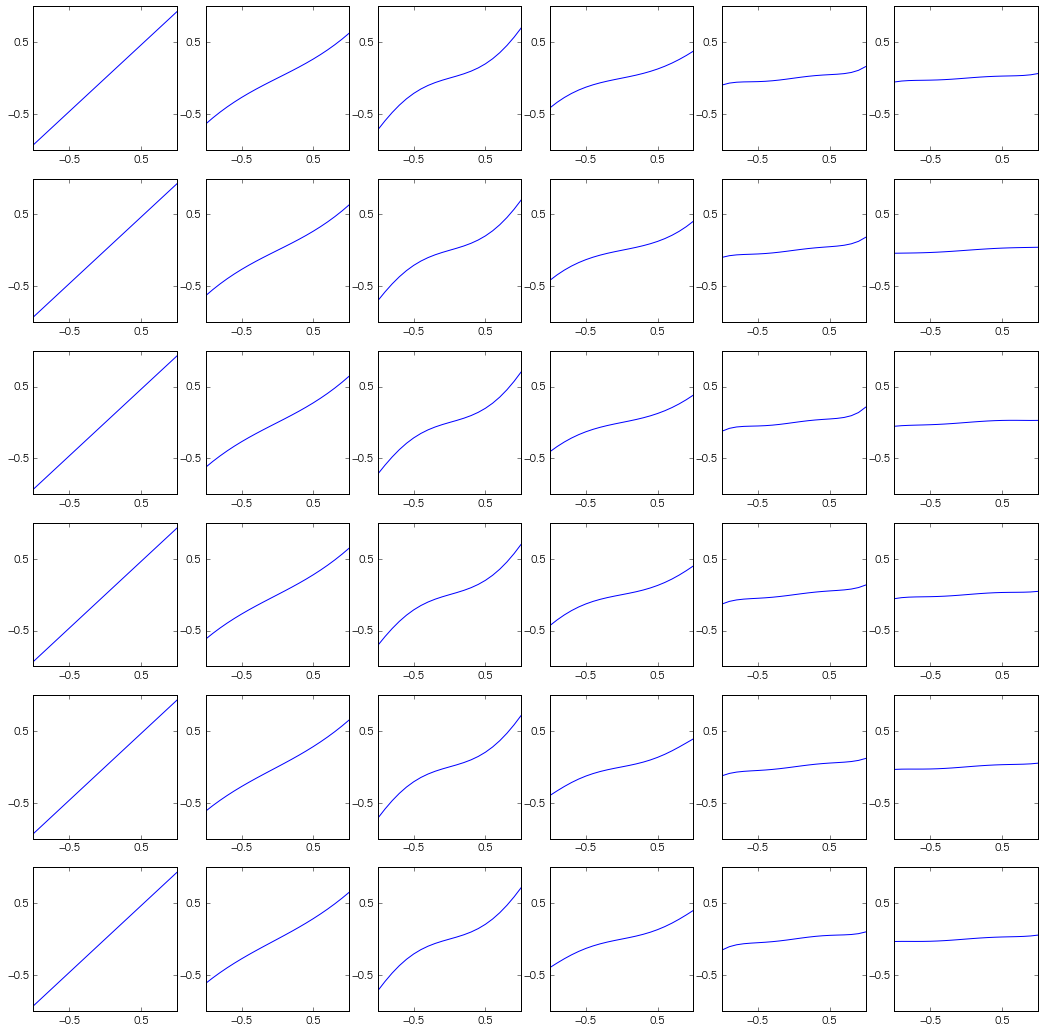

In [31]:
def plot_shrinkage_curve(c, J=6, patch_size=6):
    """ 縮小曲線を表示 """
    fig, ax = plt.subplots(6, 6, figsize=(18, 18))
    ax = ax.flatten()
    x = np.linspace(-1, 1, 21)
    for i in range(patch_size ** 2):
        y = np.zeros_like(x)
        for j in range(J):
            y += (x ** j) * c[i * J + j]
        ax[i].plot(x, y)
        ax[i].set_ylim(-1, 1)
        ax[i].set_yticks([-0.5, 0.5])
        ax[i].set_xticks([-0.5, 0.5])

c_local = np.fromfile('c_local')
plot_shrinkage_curve(c_local.flatten())

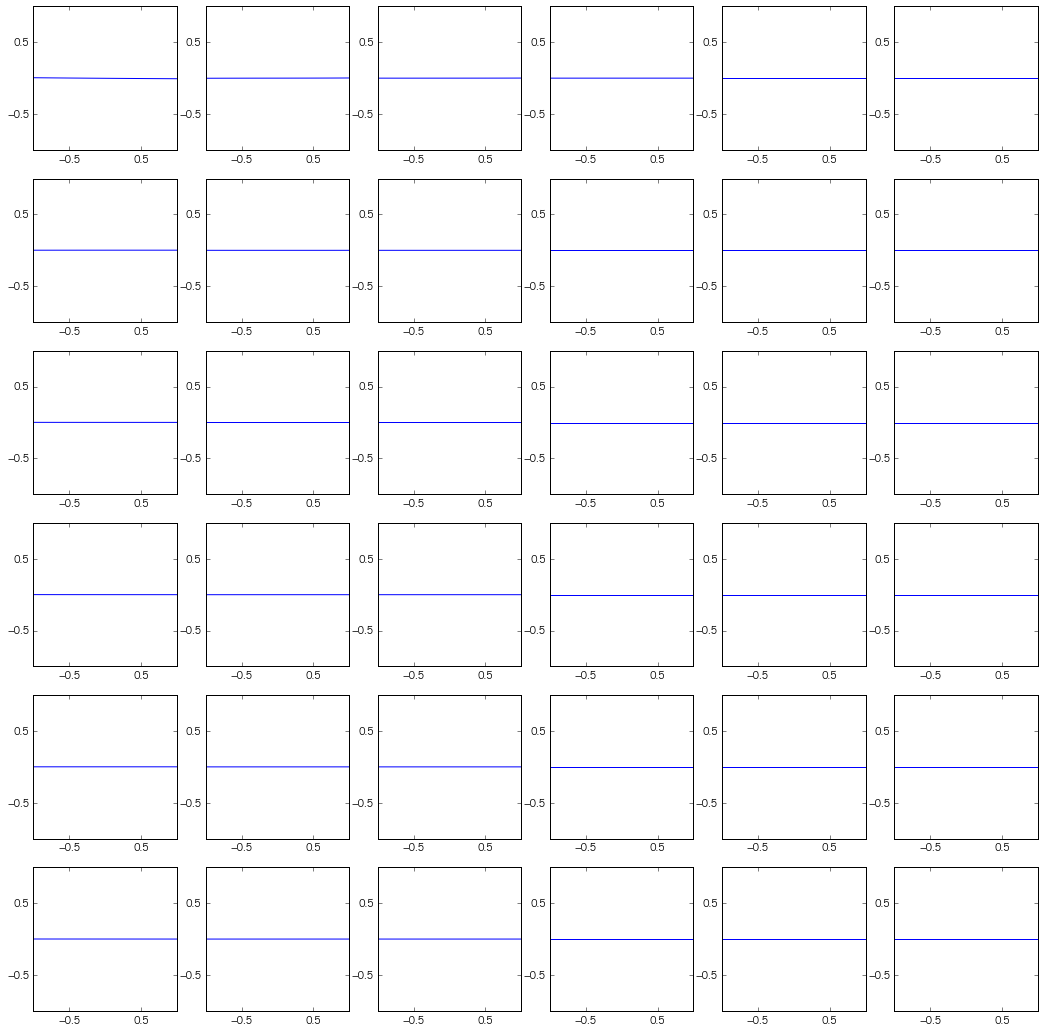

In [32]:
c_global = np.fromfile('c_global')
plot_shrinkage_curve(c_global.flatten())

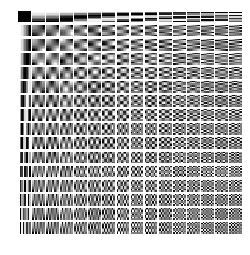

In [4]:
A_DCT = np.fromfile('A_DCT').reshape((64, 256))
show_dictionary(A_DCT)

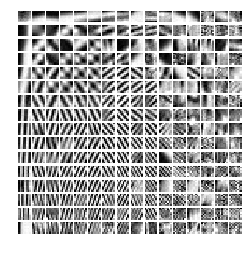

In [5]:
A_KSVD = np.fromfile('A_KSVD_sig20').reshape((64, 256))
show_dictionary(A_KSVD)